# Centrality

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from main_utils import *
from plot_utils import *
from analysis_utils import *

/tmp/ipykernel_402/573104159.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


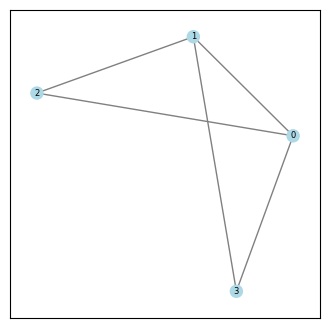

In [4]:
G = nx.Graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)])
plot_graph(G)

In [5]:
nx.degree_centrality(G)

{0: 1.0, 1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

## Generation

### Stochastic Block Model

In [ ]:
initial_graph = nx.erdos_renyi_graph(15, 0.25, seed=42)
plot_graph(initial_graph)

In [ ]:
bet_centr_dict = nx.betweenness_centrality(initial_graph)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

In [ ]:
?? nx.betweenness_centrality_subset

In [ ]:
max_bet_cent_node = max(bet_centr_dict, key=bet_centr_dict.get)

In [ ]:
max_bet_cent_node

In [ ]:
bet_centr_dict

In [ ]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 5, removal_process='betweenness_centrality')

In [ ]:
plot_graph(initial_graph)

In [ ]:
plot_graph(graph)

In [ ]:
remove_nodes_edges_dict

### PPI

In [7]:
initial_graph, group_df = mat_load_func('datasets/PPI/PPI.mat')
initial_graph.name = 'PPI'

In [8]:
advanced_info(initial_graph)

Graph Information:
Number of nodes: 3890
Number of edges: 38739
Density: 0.005121425469371459
Is connected: False
Average clustering coefficient: 0.14644876266464119
Directed: False


Around 8-9 minutes to calculate it

In [ ]:
bet_centr_dict = nx.betweenness_centrality(initial_graph)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

In [ ]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

In [ ]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

It finished in 8 minutes when we set k=100

In [ ]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

### Trying with nxp

In [9]:
import nx_parallel as nxp

In [10]:
advanced_info(initial_graph)

Graph Information:
Number of nodes: 3890
Number of edges: 38739
Density: 0.005121425469371459
Is connected: False
Average clustering coefficient: 0.14644876266464119
Directed: False


In [11]:
bet_centr_dict = nxp.betweenness_centrality(initial_graph, k=100)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

,node_id,centrality
0,3630,0.119515
1,1219,0.046365
2,291,0.034905
3,824,0.034823
4,3361,0.033478
...,...,...
3885,3481,0.000000
3886,1228,0.000000
3887,910,0.000000
3888,2268,0.000000


It took 1.5 minutes to calculate it in parallel for num_nodes=2 with centrality while it takes half a minute for 128 randomly.

In [14]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

### BlogCatalog

In [11]:
blog_dir = 'datasets/blog_catalog/data/'

initial_graph = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
initial_graph.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

In [ ]:
centrality = nx.degree_centrality(initial_graph)

In [15]:
node = max(centrality, key=centrality.get)

In [17]:
centrality[node]

0.38715934438948696

In [22]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 16, removal_process='degree_centrality')

In [23]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 16, removal_process='random')

## Comparison

In [3]:
results_df = pd.read_csv('results.csv')

In [4]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,blog_catalog,10312,333983,global,macro,0.198151,0.210151,0.200987,0.207842,0.199167,...,0.192548,0.203103,0.217410,"(128, 40, 80, 0.25, 1)",5397.766043,prune,512,9482,degree_centrality,24/07/2024 - 19:55
1,blog_catalog,10312,333983,global,micro,0.198526,0.210459,0.201428,0.208503,0.199796,...,0.192792,0.203061,0.218367,"(128, 40, 80, 0.25, 1)",5397.766043,prune,512,9482,degree_centrality,24/07/2024 - 19:55
2,blog_catalog,10312,333983,local,macro,0.193882,0.198025,0.205072,0.196822,0.197134,...,0.194145,0.183064,0.207882,"(128, 40, 80, 0.25, 1)",1585.788732,prune,512,9482,degree_centrality,24/07/2024 - 19:55
3,blog_catalog,10312,333983,local,micro,0.195884,0.198545,0.205153,0.197317,0.197828,...,0.194247,0.183228,0.208333,"(128, 40, 80, 0.25, 1)",1585.788732,prune,512,9482,degree_centrality,24/07/2024 - 19:55
4,PPI,3890,38739,global,macro,0.040925,0.063289,0.064754,0.083081,0.087135,...,0.081977,0.072052,0.085952,"(128, 40, 80, 0.25, 1)",219.054698,prune,512,2972,degree_centrality,18/07/2024 - 14:52
5,PPI,3890,38739,global,micro,0.059849,0.090270,0.095137,0.111988,0.115453,...,0.116371,0.121302,0.133136,"(128, 40, 80, 0.25, 1)",219.054698,prune,512,2972,degree_centrality,18/07/2024 - 14:52
6,PPI,3890,38739,local,macro,0.047507,0.061188,0.071808,0.067604,0.080754,...,0.085033,0.071297,0.054119,"(128, 40, 80, 0.25, 1)",42.793524,prune,512,2972,degree_centrality,18/07/2024 - 14:52
7,PPI,3890,38739,local,micro,0.087689,0.099614,0.106828,0.103256,0.110026,...,0.116438,0.105398,0.097686,"(128, 40, 80, 0.25, 1)",42.793524,prune,512,2972,degree_centrality,18/07/2024 - 14:52
8,wikipedia,4777,92517,global,macro,0.036916,0.042659,0.042098,0.039044,0.039620,...,0.043830,0.043872,0.036618,"(128, 40, 80, 0.25, 1)",698.351662,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
9,wikipedia,4777,92517,global,micro,0.377963,0.400938,0.410248,0.433763,0.442569,...,0.464844,0.464244,0.437939,"(128, 40, 80, 0.25, 1)",698.351662,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42


In [5]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [9]:
# These are the parameters for calculating the gloal/local difference
config = {'dynamic_update': 'prune',
          'retraining_type': 'local',
          'metric': 'macro',
          'parameters': '(128, 40, 80, 0.25, 1)',
          'num_different_nodes': 512}

In [10]:
sub_df = results_df.copy()

for key in config:
    sub_df = sub_df[sub_df.loc[:, key] == config[key]]


In [11]:
sub_df

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
2,blog_catalog,10312,333983,local,macro,0.193882,0.198025,0.205072,0.196822,0.197134,...,0.194145,0.183064,0.207882,"(128, 40, 80, 0.25, 1)",1585.788732,prune,512,9482,degree_centrality,24/07/2024 - 19:55
6,PPI,3890,38739,local,macro,0.047507,0.061188,0.071808,0.067604,0.080754,...,0.085033,0.071297,0.054119,"(128, 40, 80, 0.25, 1)",42.793524,prune,512,2972,degree_centrality,18/07/2024 - 14:52
10,wikipedia,4777,92517,local,macro,0.034175,0.035353,0.034788,0.032319,0.033228,...,0.039719,0.060786,0.049548,"(128, 40, 80, 0.25, 1)",172.945279,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
14,wikipedia,4777,92517,local,macro,0.031090,0.037693,0.035192,0.031203,0.034751,...,0.030344,0.027923,0.043569,"(128, 40, 80, 0.25, 1)",181.304677,prune,512,4777,degree_centrality,18/07/2024 - 12:45
22,cora,2708,5278,local,macro,0.510303,0.576113,0.595462,0.607059,0.629805,...,0.627984,0.677465,0.681987,"(128, 40, 80, 0.25, 1)",11.665169,prune,512,1644,degree_centrality,18/07/2024 - 09:56
30,PPI,3890,38739,local,macro,0.046697,0.053563,0.069599,0.068547,0.079935,...,0.086382,0.076786,0.066825,"(128, 40, 80, 0.25, 1)",50.187979,prune,512,3045,betweenness_centrality,17/07/2024 - 12:17
38,cora,2708,5278,local,macro,0.566129,0.589090,0.663587,0.670522,0.672001,...,0.673873,0.695206,0.713983,"(128, 40, 80, 0.25, 1)",9.899643,prune,512,1408,betweenness_centrality,16/07/2024 - 13:40
46,PPI,3890,38739,local,macro,0.051746,0.065970,0.071375,0.069575,0.081769,...,0.094639,0.084281,0.091723,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,random,11/07/2024 - 20:15
70,blog_catalog,10312,333983,local,macro,0.198943,0.194467,0.197401,0.193804,0.195736,...,0.200567,0.203426,0.202872,"(128, 40, 80, 0.25, 1)",1480.310039,prune,512,5876,random,27/06/2024 - 17:56
82,blog_catalog,10312,333983,local,macro,0.203722,0.206374,0.193922,0.201317,0.201297,...,0.188758,0.192953,0.178364,"(128, 40, 80, 0.25, 1)",1494.013343,prune,512,5876,random,14/06/2024 - 16:52


In [12]:
sub_df = accu_time_df_gen(results_df, config)

In [13]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
0,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.197200,1585.788732
1,PPI,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.069418,42.793524
2,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.039392,172.945279
3,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.033993,181.304677
4,cora,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.613932,11.665169
5,PPI,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.069948,50.187979
6,cora,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.658202,9.899643
7,PPI,local,"(128, 40, 80, 0.25, 1)",prune,random,0.078023,68.855529
8,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.198408,1480.310039
9,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.196315,1494.013343


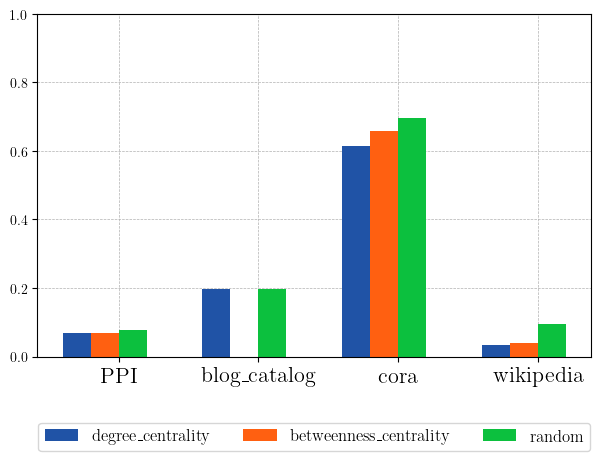

In [20]:
dataset_removal_plot(sub_df)

In [30]:
l = [1, 2, 3]
l[::-1]

[3, 2, 1]

In [23]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
0,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.197200,1585.788732
1,PPI,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.069418,42.793524
2,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.039392,172.945279
3,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.033993,181.304677
4,cora,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.613932,11.665169
5,PPI,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.069948,50.187979
6,cora,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.658202,9.899643
7,PPI,local,"(128, 40, 80, 0.25, 1)",prune,random,0.078023,68.855529
8,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.198408,1480.310039
9,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.196315,1494.013343
